# Week2授業課題1 二次元配列と勾配問題

## 【問題1】1次関数

In [219]:
import numpy as np

x_ndarray = np.arange(-50,50.1,0.1)
x_ndarray

array([-50. , -49.9, -49.8, ...,  49.8,  49.9,  50. ])

In [220]:
y_ndarray = 1/2*x_ndarray + 1
y_ndarray

array([-24.  , -23.95, -23.9 , ...,  25.9 ,  25.95,  26.  ])

## 【問題2】配列の結合

In [239]:
x_ndarray_r = np.reshape(x_ndarray,(1001,-1))
y_ndarray_r = np.reshape(y_ndarray,(1001,-1))
x_y = np.concatenate((x_ndarray_r, y_ndarray_r),axis=1)
print(x_y)
print(x_y.shape)

[[-50.   -24.  ]
 [-49.9  -23.95]
 [-49.8  -23.9 ]
 ...
 [ 49.8   25.9 ]
 [ 49.9   25.95]
 [ 50.    26.  ]]
(1001, 2)


## 【問題3】勾配を求める

In [242]:
x_sa = x_ndarray[1:] - x_ndarray[:-1]
y_sa = y_ndarray[1:] - y_ndarray[:-1]
y_sa.shape
koubai = y_sa / x_sa
koubai.shape

(1000,)

## 【問題4】グラフを描く

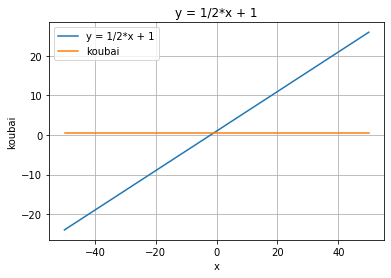

In [227]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.xlabel("x")
plt.ylabel("koubai")
plt.title("y = 1/2*x + 1")
plt.plot(x_y[:,0], x_y[:,1], label="y = 1/2*x + 1")
plt.plot(x_y[1:,0], koubai, label="koubai")
plt.grid()
plt.legend()
plt.show()

## 【問題5】Pythonの関数化

In [228]:
def compute_gradient(function, x_range=(-50, 50.1, 0.1)):
    array_x = np.arange(x_range[0], x_range[1], x_range[2])
    array_y = function(array_x)

    array_x_r = np.reshape(array_x,(len(array_x),-1))
    array_y_r = np.reshape(array_y,(len(array_y),-1))
    array_xy = np.concatenate((array_x_r, array_y_r),axis=1)

    # 勾配
    x_sa = array_x[1:] - array_x[:-1]
    y_sa = array_y[1:] - array_y[:-1]
    gradient = y_sa / x_sa

    return array_xy, gradient

### y = 1/2x + 1

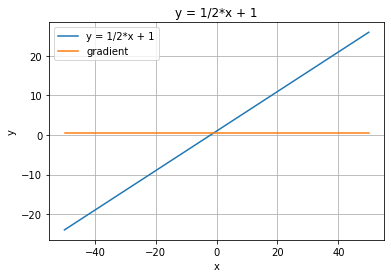

In [229]:
def function1(array_x):
    array_y = 1/2*array_x + 1
    return array_y

array_xy, gradient = compute_gradient(function1)

# グラフ描画
plt.xlabel("x")
plt.ylabel("y")
plt.title("y = 1/2*x + 1")
#plt.plot(array_xy[1:], array_xy[:-1])
plt.plot(array_xy[:,0], array_xy[:,1], label="y = 1/2*x + 1")
plt.plot(array_xy[1:,0], gradient ,label="gradient")
plt.legend()
plt.grid()
plt.show()

### y = x*2

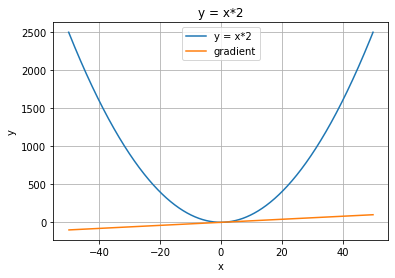

In [230]:
# y = x 2 
def function2(array_x):
    array_y = array_x**2
    return array_y

array_xy, gradient = compute_gradient(function2)

# グラフ描画
plt.xlabel("x")
plt.ylabel("y")
plt.title("y = x*2")
plt.plot(array_xy[:,0], array_xy[:,1], label="y = x*2")
plt.plot(array_xy[1:,0], gradient ,label="gradient")
plt.grid()
plt.legend()
plt.show()

### y = 2*x*2 + 2**x

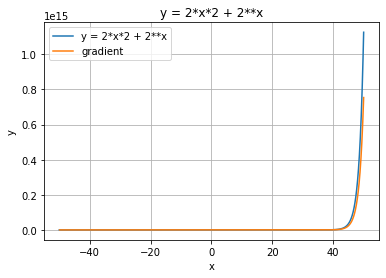

In [231]:
# y = 2*x*2 + 2**x
def function3(array_x):
    array_y = 2*array_x**2 + 2**array_x
    return array_y

array_xy, gradient = compute_gradient(function3)

# グラフ描画
plt.xlabel("x")
plt.ylabel("y")
plt.title("y = 2*x*2 + 2**x")
plt.plot(array_xy[:,0], array_xy[:,1], label="y = 2*x*2 + 2**x")
plt.plot(array_xy[1:,0], gradient ,label="gradient")
plt.legend()
plt.grid()
plt.show()

### y = sin(x**(1/2))

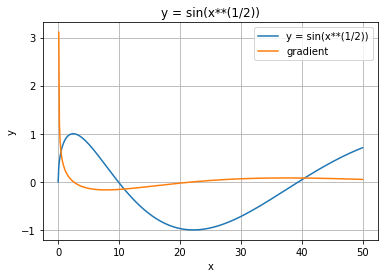

In [232]:
# y = sin(x**(1/2))

def function4(array_x):
    array_y = np.sin(array_x**(1/2))
    return array_y

array_xy, gradient = compute_gradient(function4, x_range=(0, 50.1, 0.1))

# グラフ描画
plt.xlabel("x")
plt.ylabel("y")
plt.title("y = sin(x**(1/2))")
plt.plot(array_xy[:,0], array_xy[:,1], label="y = sin(x**(1/2))")
plt.plot(array_xy[1:,0], gradient ,label="gradient")
plt.grid()
plt.legend()
plt.show()

## 【問題6】最小値を求める

### y = 1/2x + 1

In [233]:
### y = 1/2x + 1
def function1(array_x):
    array_y = 1/2*array_x + 1
    return array_y

array_xy, gradient = compute_gradient(function1)
# yの最小値
print("yの最小値: {}".format(np.min(array_xy[:,1])))
# yの最小値のインデックス時の勾配の前の値
print("最小値の前: {}".format(gradient[np.argmin(array_xy[:,1])-1]))
print("最小値の後: {}".format(gradient[np.argmin(array_xy[:,1])+1]))

yの最小値: -24.0
最小値の前: 0.5
最小値の後: 0.5


### y = x*2

In [234]:
# y = x 2 
def function2(array_x):
    array_y = array_x**2
    return array_y

array_xy, gradient = compute_gradient(function2)
# yの最小値
print("yの最小値: {}".format(np.min(array_xy[:,1])))
# yの最小値のインデックス時の勾配の前の値
print("最小値の前: {}".format(gradient[np.argmin(array_xy[:,1])-1]))
print("最小値の後: {}".format(gradient[np.argmin(array_xy[:,1])+1]))

yの最小値: 5.048709793414476e-25
最小値の前: -0.09999999999858034
最小値の後: 0.30000000000142535


### y = 2*x*2 + 2**x

In [235]:
# y = 2*x*2 + 2**x
def function3(array_x):
    array_y = 2*array_x**2 + 2**array_x
    return array_y

array_xy, gradient = compute_gradient(function3)
# yの最小値
print("yの最小値: {}".format(np.min(array_xy[:,1])))
# yの最小値のインデックス時の勾配の前の値
print("最小値の前: {}".format(gradient[np.argmin(array_xy[:,1])-1]))
print("最小値の後: {}".format(gradient[np.argmin(array_xy[:,1])+1]))

yの最小値: 0.9505505632959851
最小値の前: -0.4170183305979998
最小値の後: 0.4696700846350943


### y = sin(x**(1/2))

In [237]:
# y = sin(x**(1/2))

def function4(array_x):
    array_y = np.sin(array_x**(1/2))
    return array_y

array_xy, gradient = compute_gradient(function4, x_range=(0, 50.1, 0.1))
# yの最小値
print("yの最小値: {}".format(np.min(array_xy[:,1])))
# yの最小値のインデックス時の勾配の前の値
print("最小値の前: {}".format(gradient[np.argmin(array_xy[:,1])-1]))
print("最小値の後: {}".format(gradient[np.argmin(array_xy[:,1])+1]))

yの最小値: -0.9999997540298113
最小値の前: -0.0006388422559544435
最小値の後: 0.0016061158921243152
